### Load Required Packages and Data

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import scipy.special
import ghalton
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [3]:
from utils import clean,to_radian,hann,res_to_rad,ax_to_w,rep_to_angle
from Bessel_Interp import generate_halton_points
from rotation_2d import rot_cost_func, imrotate
from visualize import plot_cost_func, plot_cost_func_t,plot_volume
from cost_functions import cf_ssd
from mask import sphere_mask

In [4]:
axes_dict = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/for_cluster/axes_dict.p','rb'))
rot_axes = ['xz', 'y', 'yz', 'xy', 'x', 'z']
ax_to_idx = {}
for rot_ax in rot_axes:
    ax_to_idx[rot_ax] = rot_axes.index(rot_ax)
    
rot_axes_tricubic = ['x', 'y', 'z', 'xy', 'yz', 'xz']
ax_to_idx_tricubic = {}
for rot_ax in rot_axes_tricubic:
    ax_to_idx_tricubic[rot_ax] = rot_axes_tricubic.index(rot_ax)%3
print ax_to_idx_tricubic

{'xy': 0, 'xz': 2, 'yz': 1, 'y': 1, 'x': 0, 'z': 2}


In [29]:
oct13_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_10.p','rb'))
oct13_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_8.p','rb'))
oct13_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_6_4.p','rb'))

# Rotations

In [5]:
from oct13_visualize import preprocess,load_pickle,split_plot,scatter_plot_cubic,scatter_plot,scatter_plot_all_linear,error_in_time,error_plot

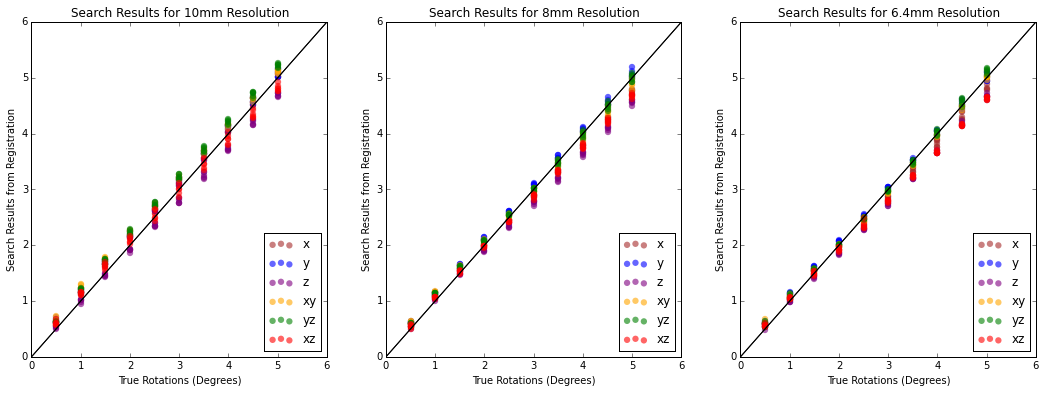

In [30]:
# # Tricubic Interpolation Results all together
cost_dict_10 = load_pickle('10','xyz')
cost_dict_10_1 = load_pickle('10','xyyzxz')

cost_dict_8 = load_pickle('8','xyz')
cost_dict_8_1 = load_pickle('8','xyyzxz')

cost_dict_6_4 = load_pickle('6_4','xyz')
cost_dict_6_4_1 = load_pickle('6_4','xyyzxz')

plt.figure(figsize = [18,6])
plt.subplot(1,3,1)
scatter_plot_cubic(cost_dict_10, '10mm', ['x','y','z'], 0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_10_1, '10mm', ['xy','yz','xz'], 0.01,ax_to_idx_tricubic)
plt.subplot(1,3,2)
scatter_plot_cubic(cost_dict_8, '8mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_8_1, '8mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.subplot(1,3,3)
scatter_plot_cubic(cost_dict_6_4, '6.4mm', ['x','y','z'],0.01,ax_to_idx_tricubic)
scatter_plot_cubic(cost_dict_6_4_1, '6.4mm', ['xy','yz','xz'],0.01,ax_to_idx_tricubic)
plt.show()

In [31]:
from oct13_visualize import scatter_plot_cubic1

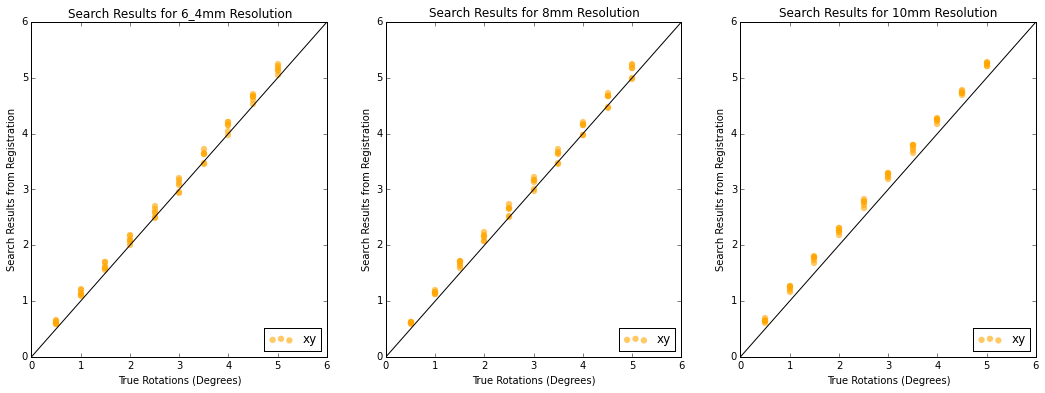

In [8]:
cost_dict_5mm_trans_rot0= pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_tricubic_5mm_trans_rotation_0.p','rb'))
cost_dict_5mm_trans_rot1= pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_tricubic_5mm_trans_rotation_1.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost_dict = {}
    cost_dict.update(cost_dict_5mm_trans_rot0[idx])
    cost_dict.update(cost_dict_5mm_trans_rot1[idx])
    plt.subplot(1,3,idx+1)
    scatter_plot_cubic1(cost_dict,res,axes_dict.keys(), 0.01,ax_to_idx_tricubic)
plt.show()

### Show interpolation results one rotation axis per plot

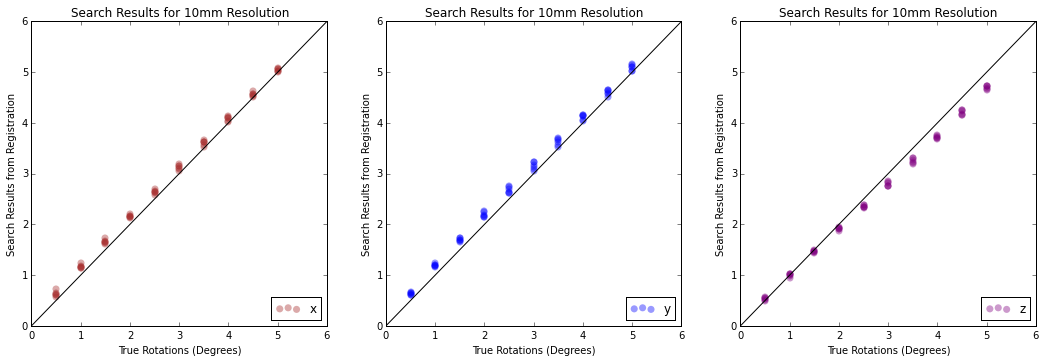

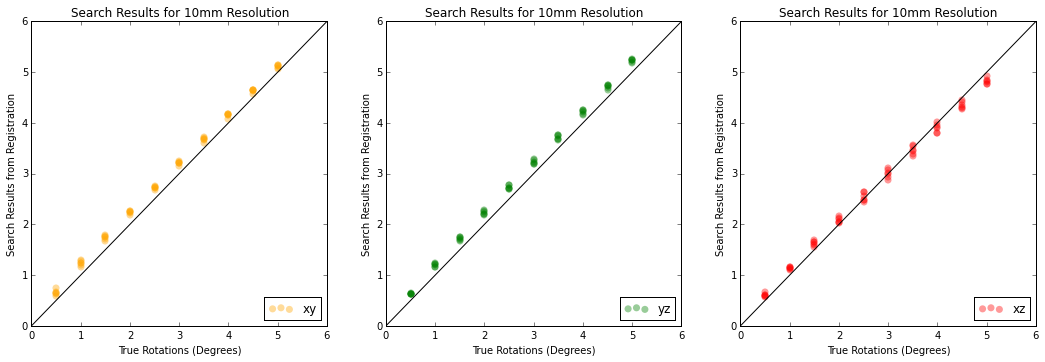

In [9]:
split_plot(cost_dict_10,cost_dict_10_1,'10mm',ax_to_idx_tricubic)

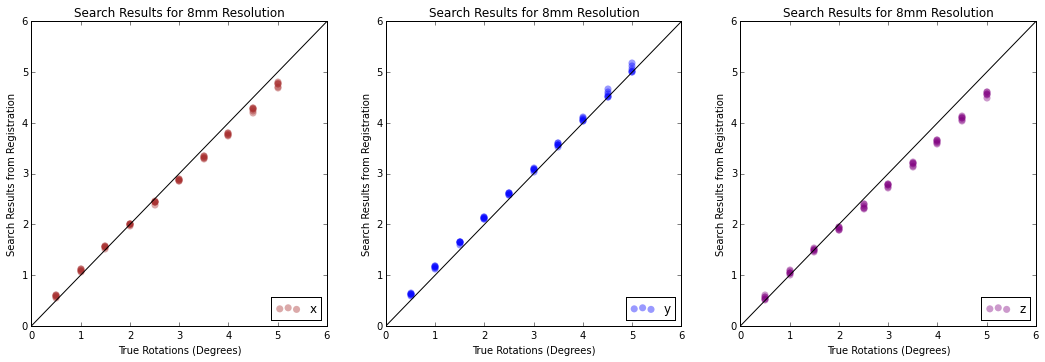

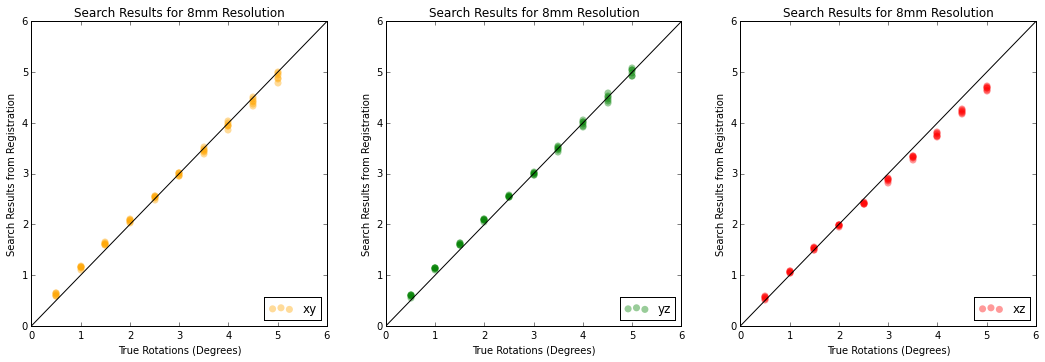

In [10]:
split_plot(cost_dict_8,cost_dict_8_1,'8mm',ax_to_idx_tricubic)

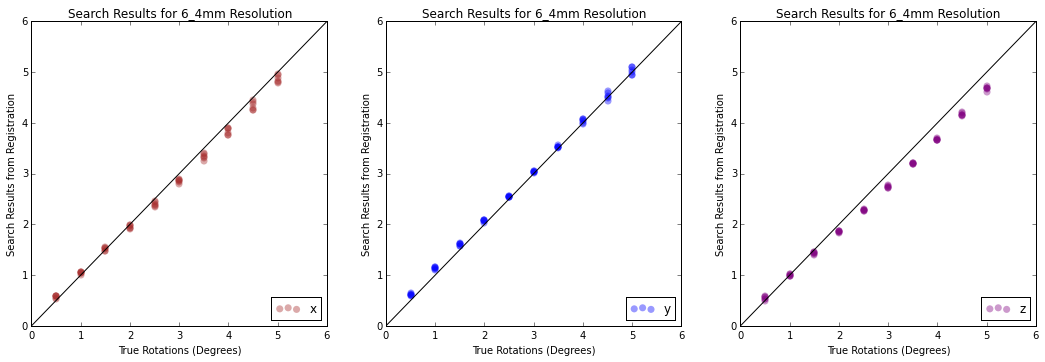

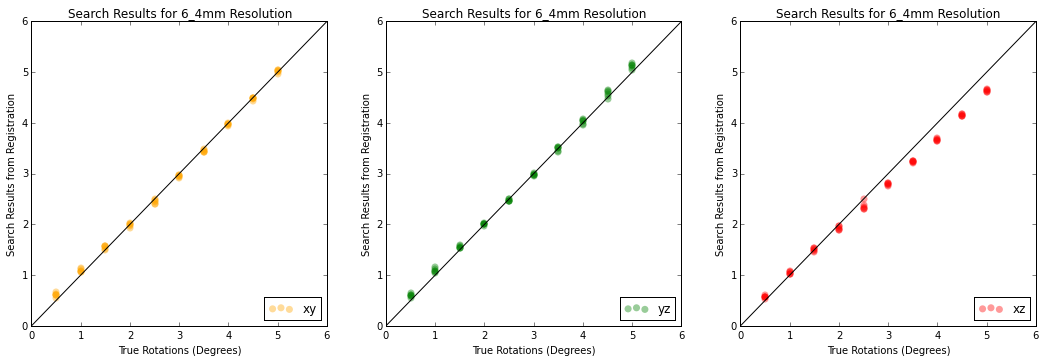

In [11]:
split_plot(cost_dict_6_4,cost_dict_6_4_1,'6_4mm',ax_to_idx_tricubic)

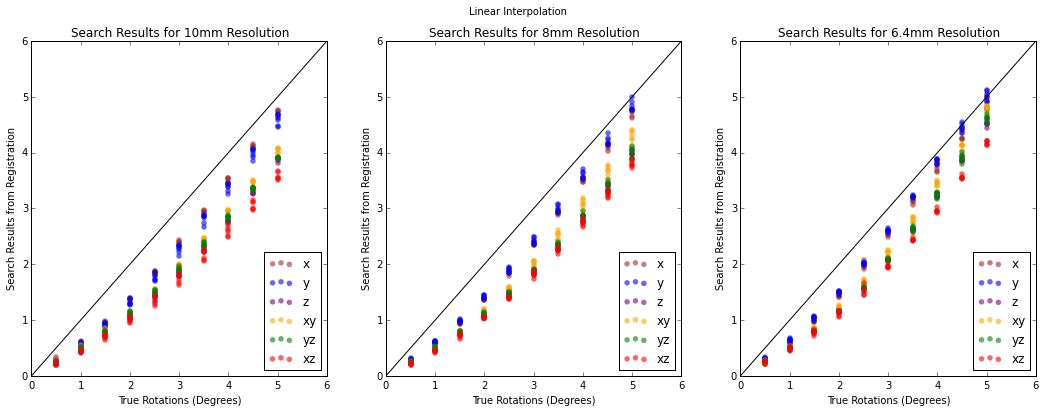

In [12]:
# Trilinear interpolation results
#10mm
cost_dict_10_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_linear_10_rotation.p','rb'))
# 8mm
cost_dict_8_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_linear_8_rotation.p','rb'))
#6.4mm
cost_dict_6_4_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_linear_6_4_rotation.p','rb'))

scatter_plot_all_linear(['x','y','z','xy','yz','xz'], cost_dict_10_linear, cost_dict_8_linear, cost_dict_6_4_linear,[18,6])

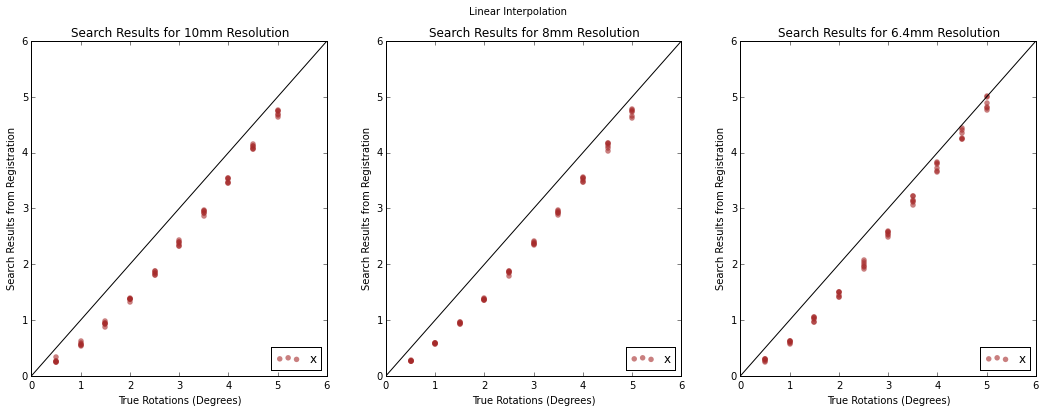

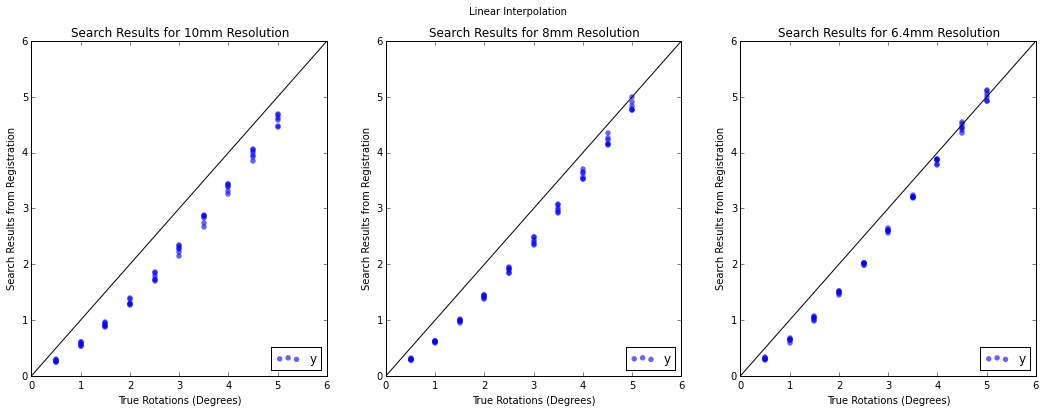

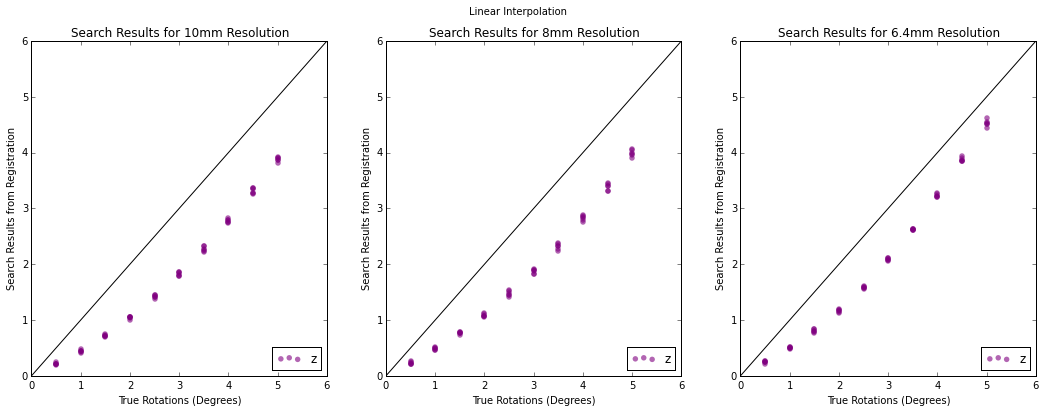

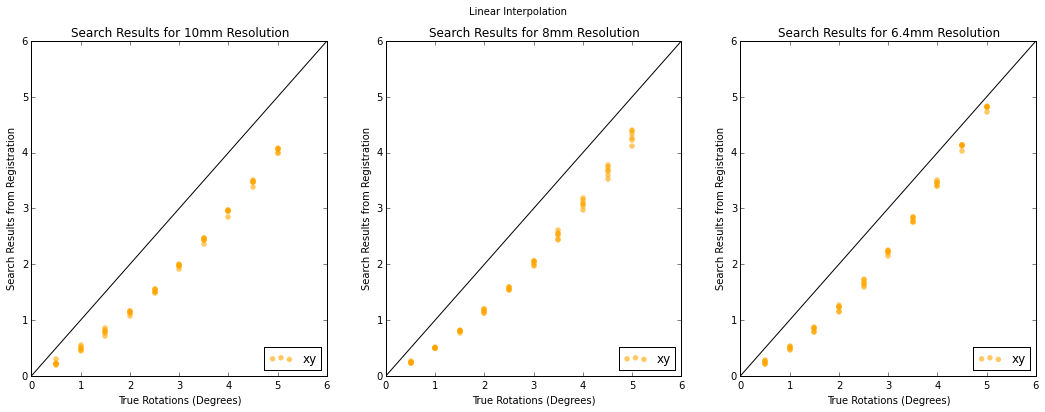

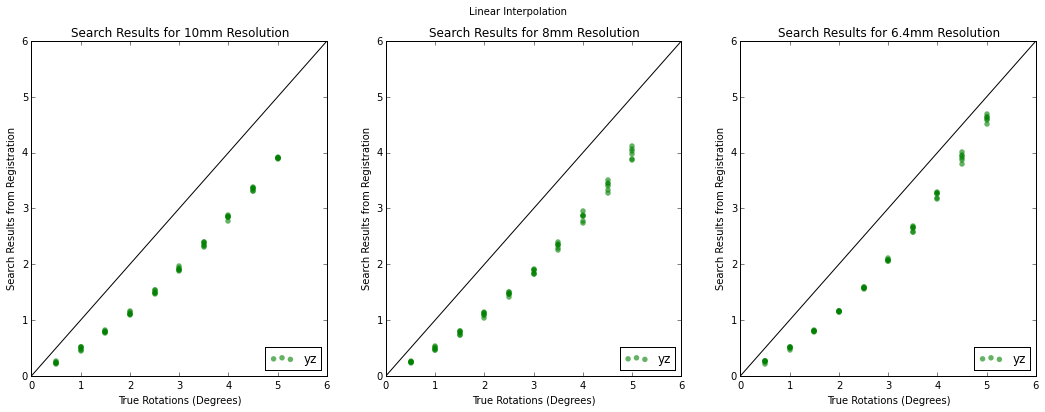

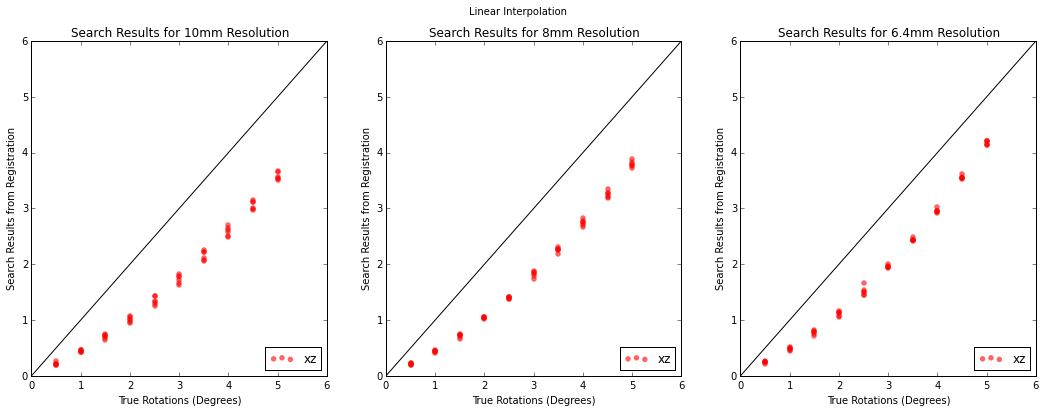

In [13]:
for ax in ['x','y','z','xy','yz','xz']:
    axes = [ax]
    scatter_plot_all_linear(axes, cost_dict_10_linear, cost_dict_8_linear, cost_dict_6_4_linear,[18,6])

### Error Plots
Now for the error plot, I'm plotting true_degree-search results, without taking the absolute value of that, and I'm also drawing a threshold of [-0.05,0.05] on all plots as a reference.

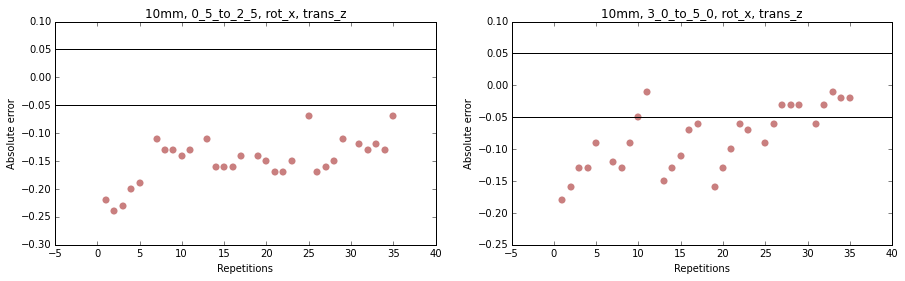

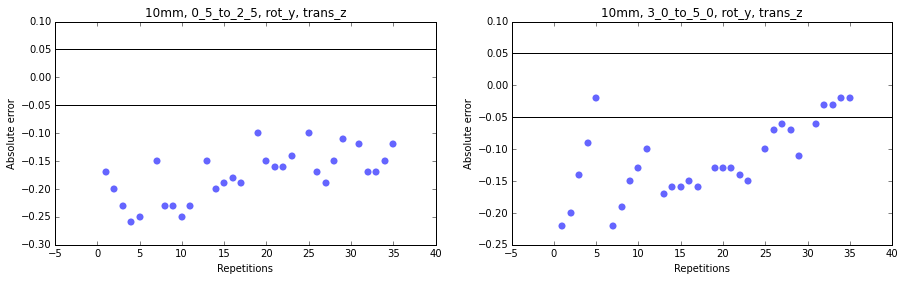

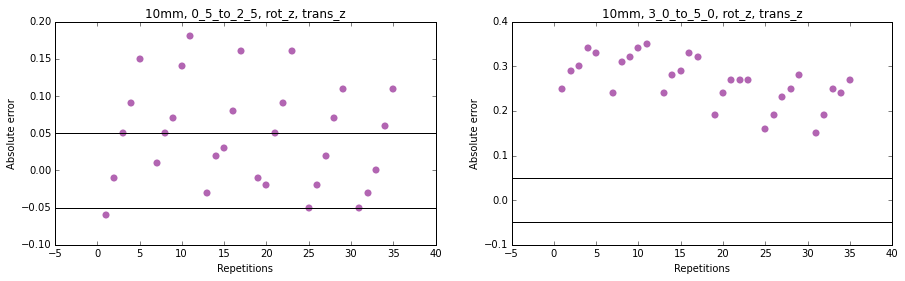

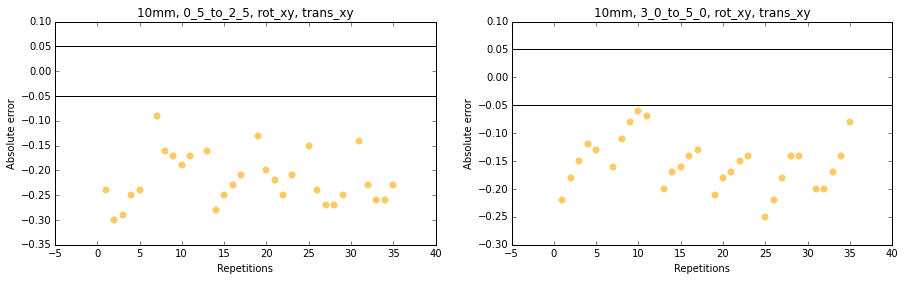

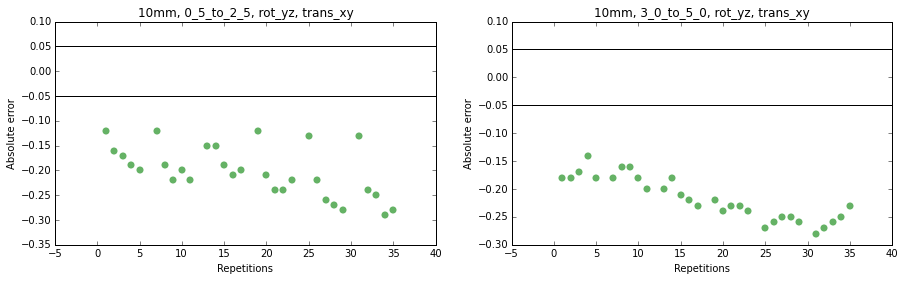

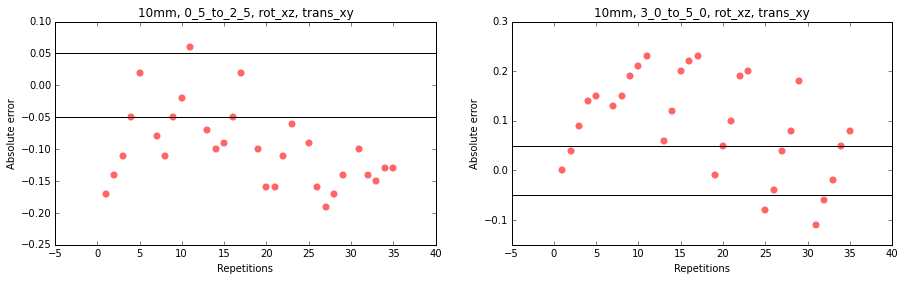

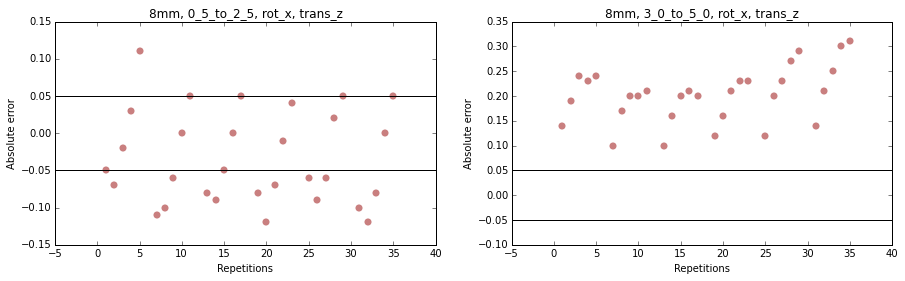

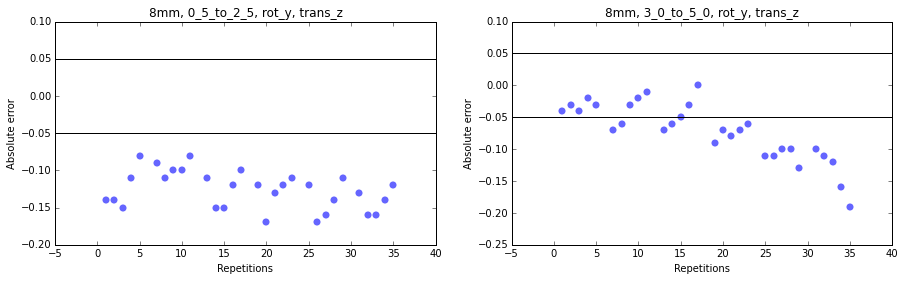

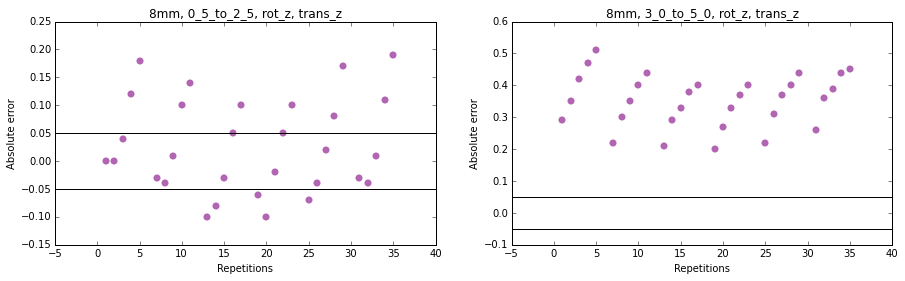

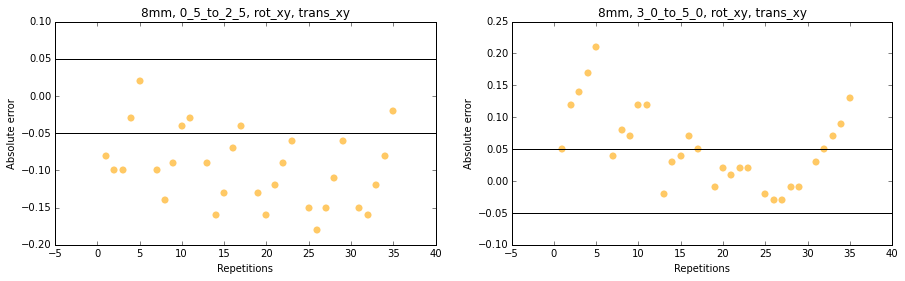

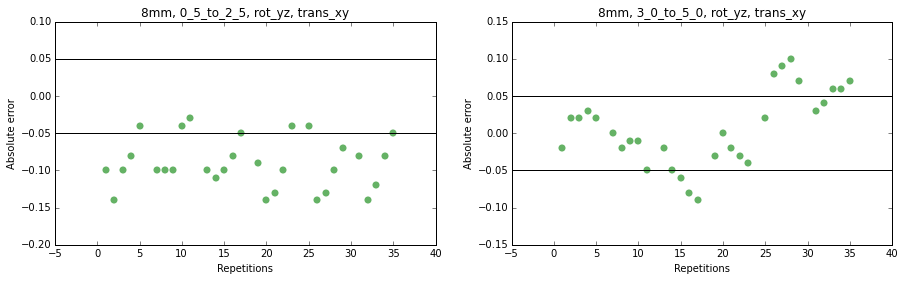

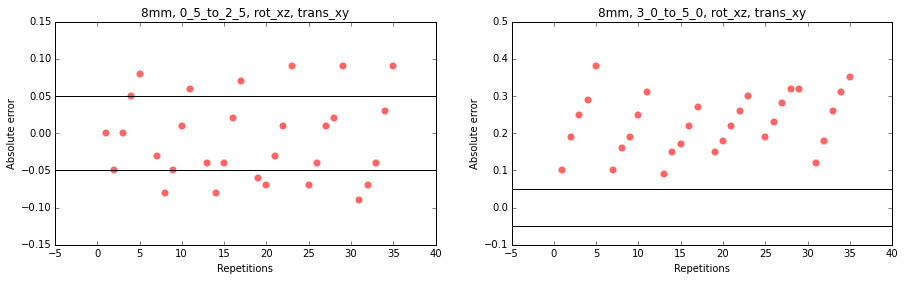

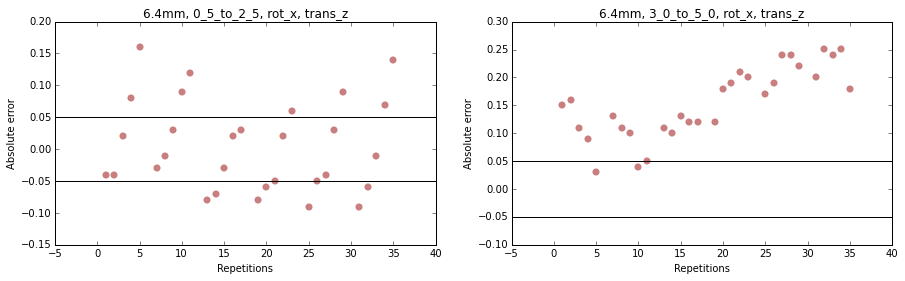

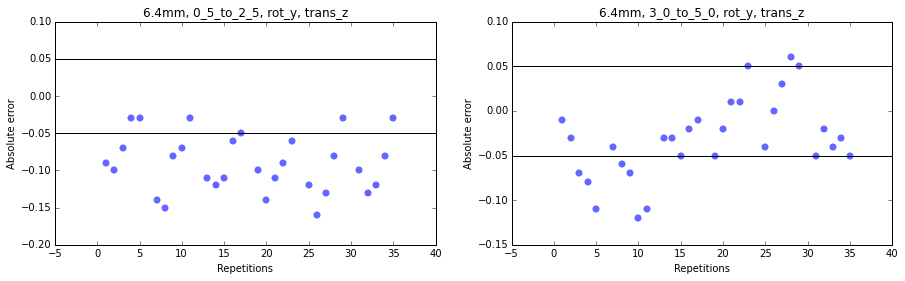

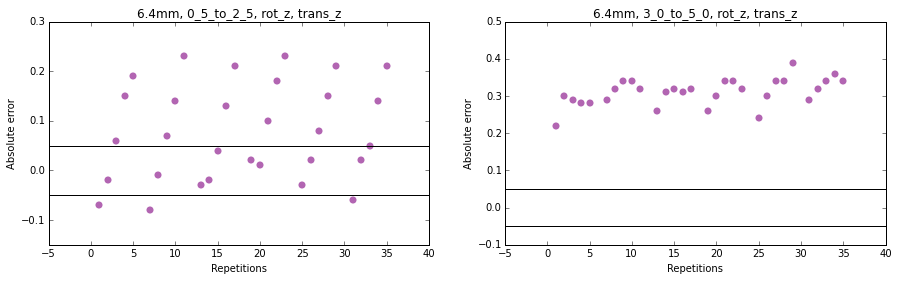

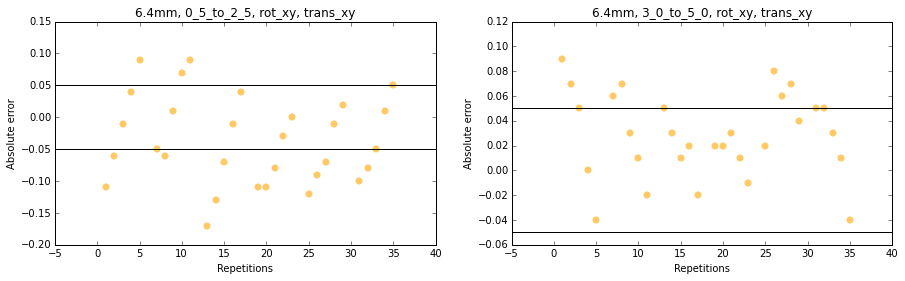

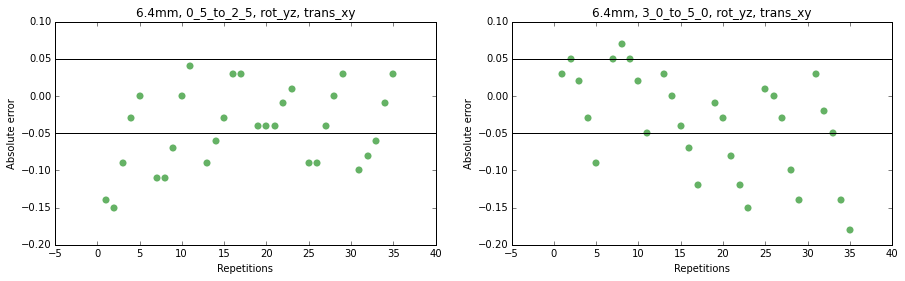

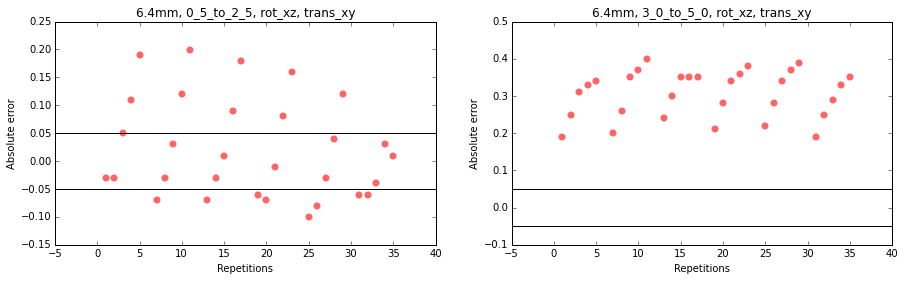

In [14]:
# Error in time for tricubic interpolation
error_in_time(cost_dict_10,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_10_1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

error_in_time(cost_dict_8,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_8_1,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

error_in_time(cost_dict_6_4,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
error_in_time(cost_dict_6_4_1,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)

In [ ]:
error_in_time(cost_dict_10_linear,'10mm')
error_in_time(cost_dict_8_linear,'8mm')
error_in_time(cost_dict_6_4_linear,'6.4mm')

In [58]:
def error_plot_rotations(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = [1,2,3,4,5,6]
    labels = ['10mm\nCubic','10mm\nLinear','8mm\nCubic','8mm\nLinear','6.4mm\nCubic','6.4mm\nLinear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-3, -3, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    error_plot(cost_dict_10,1,'10mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    error_plot(cost_dict_10_1,1,'10mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    error_plot(cost_dict_10_linear,2,'10mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    error_plot(cost_dict_8,3,'8mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    error_plot(cost_dict_8_1,3,'8mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    error_plot(cost_dict_8_linear,4,'8mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    error_plot(cost_dict_6_4,5,'6.4mm',0.01, ['x','y','z'], ax_to_idx_tricubic)
    error_plot(cost_dict_6_4_1,5,'6.4mm',0.01, ['xy','yz','xz'], ax_to_idx_tricubic)
    error_plot(cost_dict_6_4_linear,6,'6.4mm',0.01, ['x','y','z','xy','yz','xz'], ax_to_idx,3)
    plt.hlines(0,0,12,color = 'r',linestyle='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

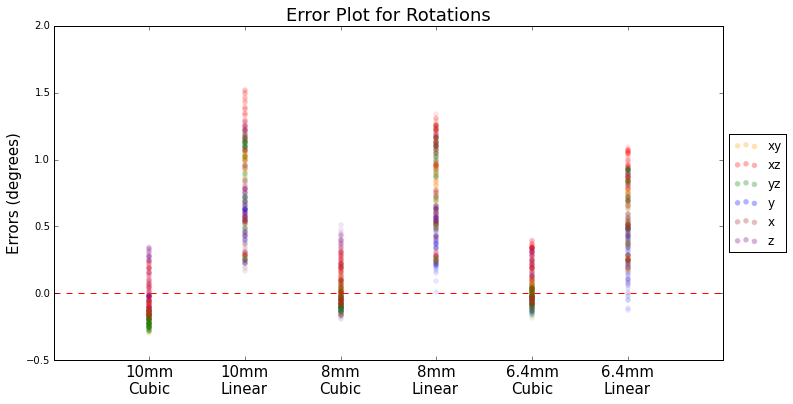

In [59]:
error_plot_rotations([12,6])

# Translations

In [49]:
from oct13_visualize import scatter_plot_all_trans, error_in_time_trans,error_plot_trans

In [65]:
def error_plot_translations(figsize):
    colors = ['red','blue','green','orange','brown','purple']
    x = [1,2,3,4,5,6]
    labels = ['10mm\nCubic','10mm\nLinear','8mm\nCubic','8mm\nLinear','6.4mm\nCubic','6.4mm\nLinear']
    plt.figure(figsize = figsize)
    plt.xticks(x, labels, rotation='horizontal',fontsize=15)
    for rot_ax in axes_dict.keys():
        plt.scatter(-5, -5, lw=0,s = 30, c = colors[ax_to_idx[rot_ax]],alpha = 0.3,marker='o' , label=rot_ax)
    error_plot_trans(cost_dict_10_trans,1,'10mm')
    error_plot_trans(cost_dict_10_trans_linear,2,'10mm')
    error_plot_trans(cost_dict_8_trans,3,'8mm')
    error_plot_trans(cost_dict_8_trans_linear,4,'8mm')
    error_plot_trans(cost_dict_6_4_trans,5,'6.4mm')
    error_plot_trans(cost_dict_6_4_trans_linear,6,'6.4mm')
    plt.hlines(0,0,12,color = 'r',linestyle='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

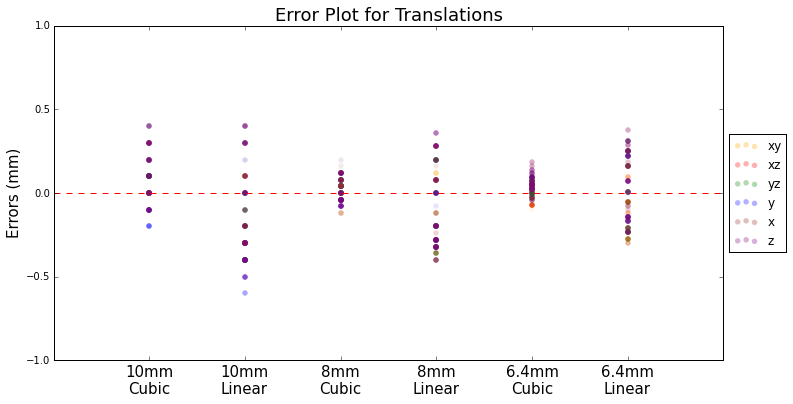

In [66]:
error_plot_translations([12,6])

In [34]:
from oct13_visualize import scatter_plot_trans1

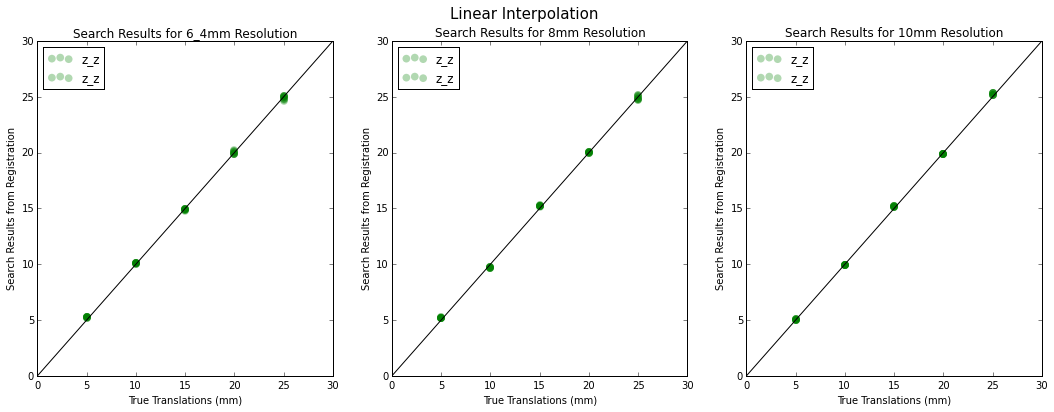

In [35]:
cost_trans_linear_nomask = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_cost_trans_linear_nomask.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = cost_trans_linear_nomask[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res)
plt.suptitle('Linear Interpolation',fontsize=15)
plt.show()

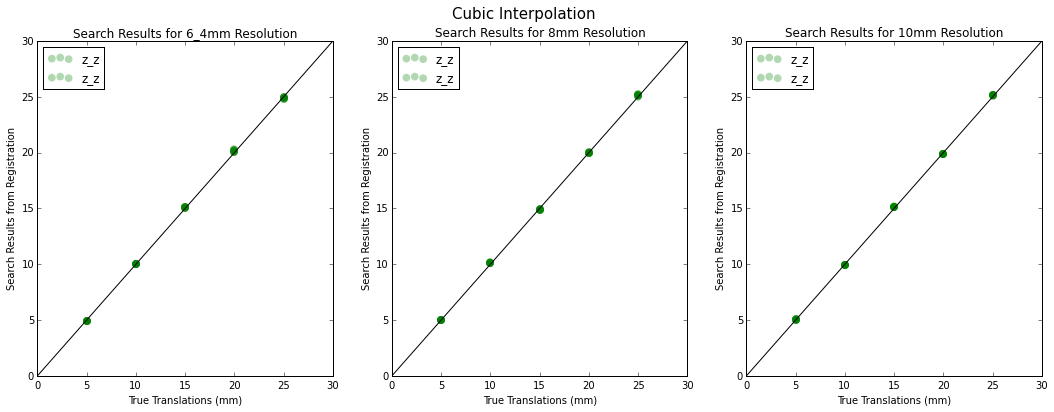

In [36]:
cost_trans_cubic_nomask = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_cost_trans_cubic_nomask.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = cost_trans_cubic_nomask[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res)
plt.suptitle('Cubic Interpolation',fontsize=15)
plt.show()

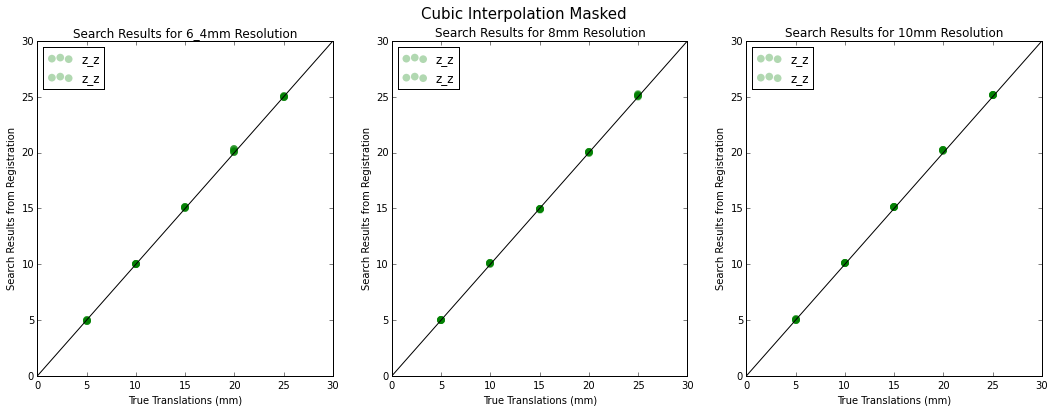

In [38]:
cost_trans_cubic = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_5mm_trans_cost_trans_cubic.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
plt.figure(figsize=[18,6])
for idx, res in enumerate(resolutions):
    cost = cost_trans_cubic[res]
    plt.subplot(1,3,idx+1)
    scatter_plot_trans1(cost,res)
plt.suptitle('Cubic Interpolation Masked',fontsize=15)
plt.show()

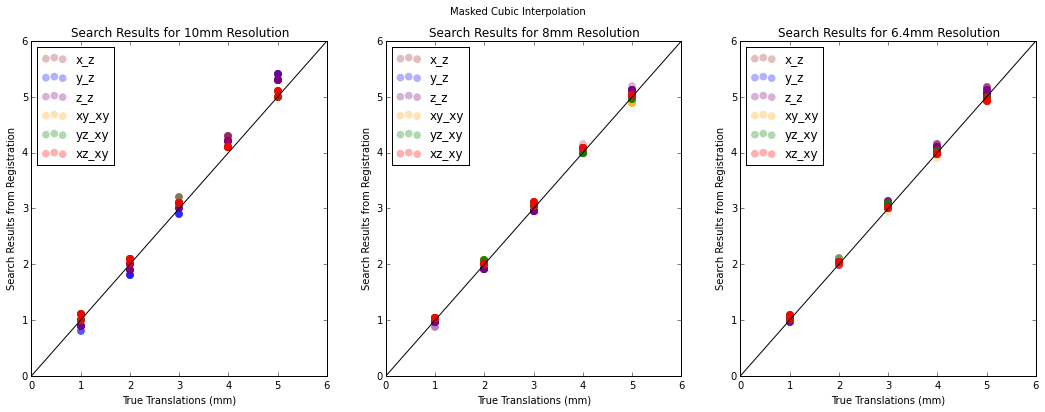

In [62]:
# Cubic With Mask
#10mm
cost_dict_10_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_10.p','rb'))
# 8mm
cost_dict_8_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_8.p','rb'))
#6.4mm
cost_dict_6_4_trans = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_6_4.p','rb'))
# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10_trans, cost_dict_8_trans, cost_dict_6_4_trans, [18,6],interp = 'Masked Cubic')

# for ax in ['x','y','z','xy','yz','xz']:
#     axes = [ax]
#     scatter_plot_all_trans(axes, cost_dict_10_trans, cost_dict_8_trans, cost_dict_6_4_trans, [18,6],interp='Masked Cubic')

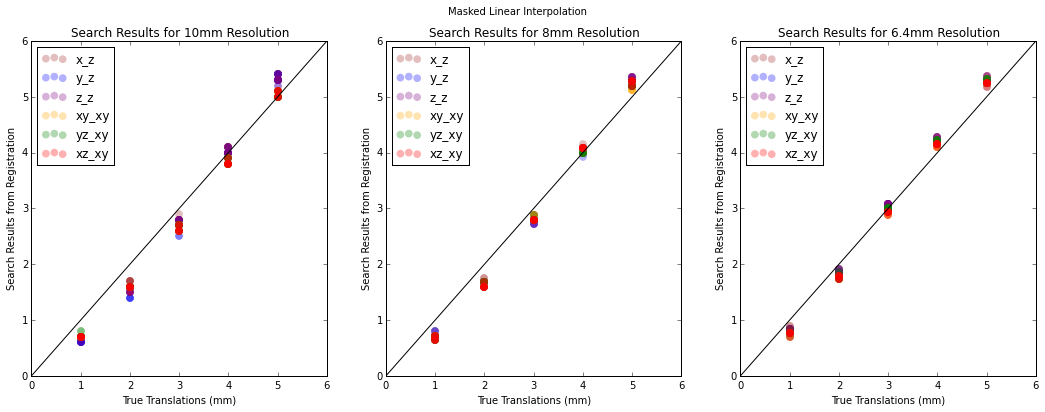

In [63]:
# Linear With Mask
#10mm
cost_dict_10_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_linear_10.p','rb'))
# 8mm
cost_dict_8_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_linear_8.p','rb'))
#6.4mm
cost_dict_6_4_trans_linear = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_cost_trans_linear_6_4.p','rb'))

# Scatter Plot
scatter_plot_all_trans(['x','y','z','xy','yz','xz'], cost_dict_10_trans_linear, 
                       cost_dict_8_trans_linear, cost_dict_6_4_trans_linear, 
                       [18,6], interp = 'Masked Linear')

# for ax in ['x','y','z','xy','yz','xz']:
#     axes = [ax]
#     scatter_plot_all_trans(axes, cost_dict_10_trans_linear, cost_dict_8_trans_linear, cost_dict_6_4_trans_linear, [18,6])